In [ ]:
import tensorflow as tf
tf.__version__

'2.17.1'

# Importing Required librabries

In [ ]:
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob





We will set image size as we are using inception_v3 architecture, it expects the size of 224 by 224.


In [ ]:
Image_size = [224,224]
train_path = '/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train'
valid_path ='/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/valid'

The first argument is the shape of input image plus 3(as image is colured[RBG]).
 The second one is the weights eqaul to imagenet. And, as we know it gives 1000 outputs. Third one excludes the top layer.

In [ ]:
inception = InceptionV3(input_shape=Image_size + [3], weights='imagenet',include_top = False)

Don't train existing weights

In [ ]:
for layer in inception.layers:
  layer.trainable = False

No. of output classes

In [ ]:
folders=glob('/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/*')

In [ ]:
folders

['/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented

In [ ]:
#Flattening the output layer

x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders),activation='softmax')(x)

In [ ]:
#create model

model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 22,314,794 (85.12 MB)

 Trainable params: 512,010 (1.95 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
#Tell the model what cost and optimization method to use

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Use Data Augmentation to generate new images for training

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#Reading the training images

train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size=(224,224),
                                                 batch_size=16,
                                                 class_mode='categorical')

Found 18356 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size=(224,224),
                                            batch_size=16,
                                            class_mode='categorical'

                                                                                      )

Found 4585 images belonging to 10 classes.


Text(0.5, 1.0, 'Bacterial Spot')

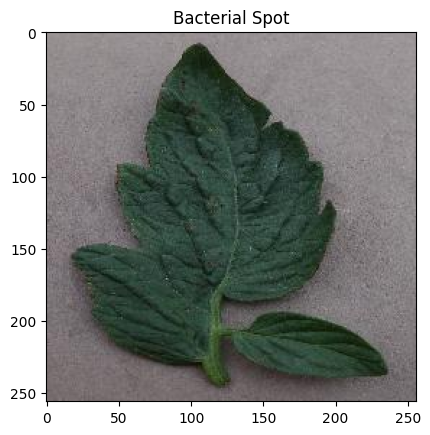

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread('/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'))
plt.title('Bacterial Spot')

Text(0.5, 1.0, 'Leaf Mold')

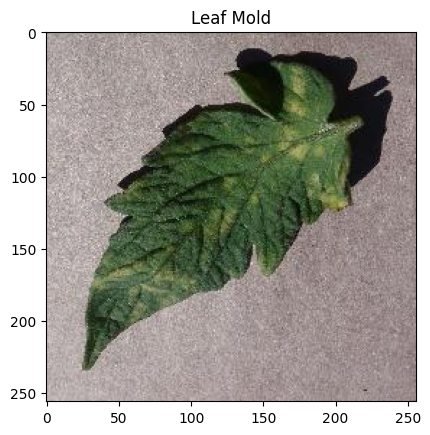

In [ ]:
plt.imshow(plt.imread('/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold/0160c3b5-d89e-40e5-a313-49ae1524040a___Crnl_L.Mold 6823_180deg.JPG'))
plt.title('Leaf Mold')

In [ ]:
#Fit the Model

mod=model.fit(train_set,
                        validation_data=test_set,
                        epochs=10,
                        steps_per_epoch=len(train_set),
                       validation_steps=len(test_set))